Build a text classification to categorize the the news into 2 categories such as 0 and 1

Step 1: Import necessary libraries

In [ ]:
# For data collection and data manipulation

import pandas as pd

Step 2: Load the dataset

In [ ]:
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
# To change the column name
df = df.rename(columns = {'label': 'category', 'tweet': 'text'})

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        31962 non-null  int64 
 1   category  31962 non-null  int64 
 2   text      31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


Step 3: Explore Data

In [ ]:
# Libraries for visualizations

import seaborn as sns
import matplotlib.pyplot as plt


Shape: (31962, 3)
Categories: category
0    29720
1     2242
Name: count, dtype: int64


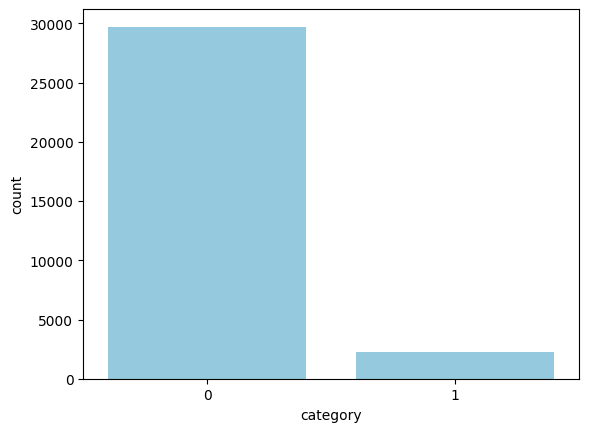

In [ ]:
print("Shape:", df.shape)       # => Output is in the form of (rows, columns)
print("Categories:", df['category'].value_counts())
sns.countplot(x = 'category', data = df, color ='skyblue')
plt.show()

Step 4: Cleaning and Pre-process text

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{"won't", 'then', 'an', 'how', 'just', 'own', "they'd", 'are', 'now', 'other', "she'd", 'haven', 'here', "wasn't", "you'd", "doesn't", 'few', "it'd", 'yours', 'against', "isn't", "we're", 'once', "aren't", 'yourself', 'won', 'didn', 'doesn', 'he', 'theirs', 'with', 'were', 're', 'was', 'being', 'than', 'me', 'because', "he'd", 'don', "you'll", "we'd", 'our', 'or', 'at', 'shouldn', "they've", 'up', 'some', 'themselves', "they'll", "you're", 'been', "i'm", 'all', 'does', 'if', "that'll", 'again', 'couldn', 'each', 'their', 'more', "we've", 'isn', 'will', 'until', 'my', 'wasn', "weren't", 'll', 'have', "we'll", 'aren', 'only', 'whom', 'had', 'has', 'y', 'who', 'both', 'out', 'that', 'during', 'mustn', "she's", "i'll", 'it', 'its', 'off', 'she', 'when', 's', 'should', "should've", 'nor', 'be', 'mightn', 'him', 'after', "didn't", 'ourselves', 'them', "shouldn't", 'between', 'm', "hadn't", 'very', 'for', 'myself', 'this', 'yourselves', 't', 'where', 'your', 'did', 'into', 'through', 'so', 'h

In [ ]:
import re

In [ ]:
df['text'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [ ]:
def clean_text(text):
  text = text.lower()
  re.sub(r'[a-zA-Z]', '', text)
  token = text.split()
  token = [w for w in token if w not in stop_words]
  return ' '.join(token)

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df['text']

,text
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


Step 5: Train Test Split

In [ ]:
x = df['cleaned_text']
y = df['category']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Step 6: Vectorize text with TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Vect = TfidfVectorizer(max_features = 5000)
x_train_vect = Vect.fit_transform(x_train)
x_test_vect = Vect.transform(x_test)

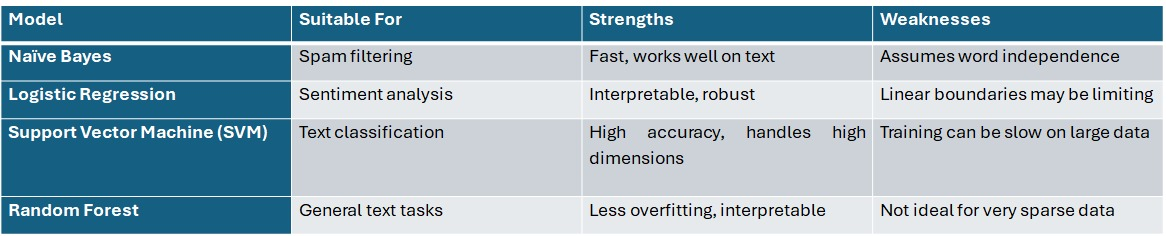

Step 7: Train Navie Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train_vect, y_train)

MultinomialNB()

Step 8: Evaluating the model

In [ ]:
y_pred = model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9515094634756766


In [ ]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.95      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.95      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



<Axes: >

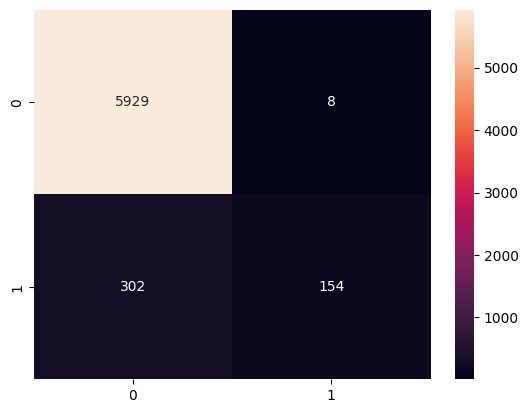

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')